# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import linear_regression
import franke
from matplotlib.tri import Triangulation
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import ipywidgets as widget
from plots import triangulation_for_triheatmap as triheatmap
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import glob as glob
from IPython.display import Image, display, HTML, Video
%matplotlib inline
import os
if not os.path.exists('data'):
    os.makedirs('data')
#note my bootstrap can be wrong. 

# Demo for applying regression to Franke data 

In [49]:
n = 100 #number of data points along each axis. Total data points = n*n
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)

y = franke.Franke(xx1, xx2, var=0.7) #zero mean gaussian noise has variance = var

In [50]:
#create linear regression object by passing input and output data
linear_reg = linear_regression.linear_regression2D(xx1, xx2, y) 

## Apply OLS 

In [53]:
linear_reg.apply_leastsquares(order=10, test_ratio=0.2)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 7.075180397287822e-05
Test MSE 7.403312057704452e-05
Train R2 0.9987233245001431
Test R2 0.998673453103384
Train bias 0.055418790343454254
Test bias 0.05580889812192416
Train model variance 0.05533074765326488
Test model variance 0.05577574146612631


## Apply OLS with bootstrap sampling

In [5]:
linear_reg.apply_leastsquares_bootstrap(order=5, test_ratio=0.1, n_boots=30)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.001400590765716386
Test MSE 0.0014117146394092002
Train R2 0.9748865963286398
Test R2 0.9744022637989711
Train bias 0.001876622238730661
Test bias 0.0018466171122748576
Train model variance 0.001830063957831136
Test model variance 0.0018000253404940028


## Apply OLS with cross validation sampling

In [6]:
linear_reg.apply_leastsquares_crossvalidation(order=5, kfolds=10)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.001402092508421429
Test MSE 0.001410881471923885
Train R2 0.9747349470361277
Test R2 0.9745156955114282
Train bias 0.005551532033135654
Test bias 0.005521514996865567
Train model variance 0.0054106704594088575
Test model variance 0.005360230028045424


## Apply Ridge regression 

In [7]:
linear_reg.apply_leastsquares(order=5, test_ratio=0.1, ridge=True, lmbda=0.1)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.0035691467036869304
Test MSE 0.003790959684329821
Train R2 0.9354526793609782
Test R2 0.9338051778230736
Train bias 0.05529504048762239
Test bias 0.05727066565093473
Train model variance 0.049805655991027986
Test model variance 0.051753573228398055


## Apply Ridge regression with bootstrap

In [8]:
linear_reg.apply_leastsquares_bootstrap(order=5, test_ratio=0.1, n_boots=30, ridge=True, lmbda=0.1)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.0035892156879234615
Test MSE 0.003600314348971053
Train R2 0.9352332002412903
Test R2 0.9353920213265532
Train bias 0.0017970810471109925
Test bias 0.0018895567633204257
Train model variance 0.0016168763006211195
Test model variance 0.0016552340338531928


## Apply Ridge regression with cross validation

In [9]:
linear_reg.apply_leastsquares_crossvalidation(order=5, kfolds=10, ridge=True, lmbda=0.1)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.0035872497627687807
Test MSE 0.0036008488958415063
Train R2 0.9353598014954458
Test R2 0.9350162231698901
Train bias 0.005513321012013793
Test bias 0.005875226516310917
Train model variance 0.004965855126802331
Test model variance 0.005086759071029689


## Apply Lasso regression: Not working properly. High R2 value

In [48]:
linear_reg.apply_leastsquares(order=10, test_ratio=0.1, scikit_lasso=True, lmbda=0.001)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)


[ 0.79267772 -0.         -0.43670673 -0.90905504  0.         -0.18542845
 -0.          0.          0.45838122 -0.          0.          0.
  0.          0.         -0.          0.          0.          0.
  0.          0.         -0.          0.          0.          0.
  0.          0.          0.         -0.          0.05724031  0.
  0.          0.          0.          0.          0.         -0.
  0.33816302  0.          0.          0.          0.          0.
  0.          0.         -0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.        ]
Train MSE 0.09641507820504935
Test MSE 0.0933565328087567
Train R2 -15594.271246573622
Test R2 -1722.6858713262645
Train bias 0.05564194415219013
Test bias 0.054161091128794255
Train model variance 0.04077313405285906
Test model variance 0.03919544167996243


In [11]:
x_train, x_test, y_train, y_test = train_test_split(np.hstack([linear_reg.x1, linear_reg.x2]), linear_reg.y, test_size=0.1)
x1_train = x_train[:, 0]
x2_train = x_train[:, 1]

x1_test = x_test[:, 0]
x2_test = x_test[:, 1]
X = linear_regression.design_mat2D(x1_train, x2_train, order=3)
lasso_reg = linear_model.Lasso(0.01, fit_intercept=False)
lasso_reg.fit(np.asmatrix(X), np.asmatrix(y_train))
y_model_train = lasso_reg.predict(X)
y_model_test = lasso_reg.predict(linear_regression.design_mat2D(x1_test, x2_test, order=3))
print(lasso_reg.intercept_)
print(lasso_reg.coef_)

0.0
[ 0.5311666  -0.         -0.01710071 -0.38414617 -0.         -0.2173065
 -0.         -0.         -0.         -0.        ]


/home/quasar/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/home/quasar/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [12]:
x1 = np.linspace(1,10,10)
x2 = np.linspace(1,10,10)
y = np.linspace(4,23,10)
x_train, x_test, y_train, y_test = train_test_split(np.hstack([linear_reg.x1, linear_reg.x2]), linear_reg.y, test_size=0.1)
x1_train = x_train[:, 0]
x2_train = x_train[:, 1]

x1_test = x_test[:, 0]
x2_test = x_test[:, 1]
X = linear_regression.design_mat2D(x1_train, x2_train, order=1)
lasso_reg = linear_model.Lasso(alpha=0.01, fit_intercept=False)
lasso_reg.fit(np.asmatrix(X), np.asmatrix(y_train))
y_model_train = lasso_reg.predict(X)
y_model_test = lasso_reg.predict(linear_regression.design_mat2D(x1_test, x2_test, order=1))
print(lasso_reg.intercept_)
print(lasso_reg.coef_)


0.0
[ 0.62281849 -0.37030444 -0.23300782]


/home/quasar/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/home/quasar/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


# Regression Comparisons

In [19]:
p = np.arange(1,11)
n = np.array([20, 50, 100, 200])#, 200, 30])
noise = np.array([0.0, 0.25, 0.5])#, 0.75, 1])
r = np.arange(1,5)*0.1

n_boots = np.array([2, 5, 10], dtype=int)
k_folds = np.array([2, 5, 10], dtype=int)
ridge_lambda = np.array([0.01, 0.1, 1.0])

#n_boots = np.array([10], dtype=int)
#k_folds = np.array([10], dtype=int)
#ridge_lambda = np.array([1])

np.save("data/p.npy", p)
np.save("data/n.npy", n)
np.save("data/noise.npy", noise)
np.save("data/r.npy", r)
np.save("data/k_folds.npy", k_folds)
np.save("data/n_boots.npy", n_boots)
np.save("data/ridge_lambda.npy", ridge_lambda)

In [16]:
from apply_regression import apply_regression2
methods = ["ols", "ols_bootstrap", "ols_crossvalidation", "ridge", "ridge_bootstrap", "ridge_crossvalidation"]
for method in methods:
    if(method=="ols_crossvalidation" or method=="ridge_crossvalidation"):
        r = np.ones(1)*0.1
    if(method=="ols" or method=="ols_crossvalidation" or method=="ridge" or method=="ridge_crossvalidation"):
        n_boots = np.ones(1, dtype=int)
    if(method=="ols" or method=="ols_bootstrap" or method=="ridge" or method=="ridge_bootstrap"):
        k_folds = np.ones(1, dtype=int)
    if(method=="ols" or method=="ols_bootstrap" or method=="ols_crossvalidation"):
        ridge_lambda = np.ones(1)
    train_MSE, test_MSE, train_R2, test_R2 = apply_regression2(p, n, 
                                                               noise, r, n_boots=n_boots, k_folds=k_folds,
                                                               ridge_lambda=ridge_lambda, reg_type=method)
    r=np.load("data/r.npy")
    ridge_lambda=np.load("data/ridge_lambda.npy")
    k_folds=np.load("data/k_folds.npy")
    n_boots=np.load("data/n_boots.npy")
    np.save("data/train_MSE"+method+".npy", train_MSE)
    np.save("data/test_MSE"+method+".npy", test_MSE)
    np.save("data/train_R2"+method+".npy", train_R2)
    np.save("data/test_R2"+method+".npy", test_R2)
    print(train_MSE.shape)


(3, 3, 5, 4, 1, 1, 1)
(3, 3, 5, 4, 1, 3, 1)
(3, 3, 5, 1, 1, 1, 3)
(3, 3, 5, 4, 3, 1, 1)
(3, 3, 5, 4, 3, 3, 1)
(3, 3, 5, 1, 3, 1, 3)


In [17]:
from apply_regression import plot_stat
methods = ["ols", "ols_bootstrap", "ols_crossvalidation", "ridge", "ridge_bootstrap", "ridge_crossvalidation"]
stats = ["train MSE", "test MSE", "test R2"]

widget.interact(plot_stat, ratio=r.tolist(), num=n.tolist(), stat=stats, 
                method=methods, k_fold=k_folds.tolist(), n_boot=n_boots.tolist(),
                ridge_lmb=ridge_lambda.tolist())

interactive(children=(Dropdown(description='ratio', options=(0.1, 0.2, 0.30000000000000004, 0.4), value=0.1), …

<function apply_regression.plot_stat(ratio=0.1, num=100, stat='testMSE', method='ols', n_boot=1000, k_fold=1000, ridge_lmb=122.0)>

In [20]:
from apply_regression import apply_regression
methods = ["ols", "ols_bootstrap", "ols_crossvalidation", "ridge", "ridge_bootstrap", "ridge_crossvalidation"]
for method in methods:
    if(method=="ols_crossvalidation" or method=="ridge_crossvalidation"):
        r = np.ones(1)*0.1
    if(method=="ols" or method=="ols_crossvalidation" or method=="ridge" or method=="ridge_crossvalidation"):
        n_boots = np.ones(1, dtype=int)
    if(method=="ols" or method=="ols_bootstrap" or method=="ridge" or method=="ridge_bootstrap"):
        k_folds = np.ones(1, dtype=int)
    if(method=="ols" or method=="ols_bootstrap" or method=="ols_crossvalidation"):
        ridge_lambda = np.ones(1)
    train_MSE, test_MSE, train_R2, test_R2, test_bias, test_var = apply_regression(p, n, 
                                                               noise, r, n_boots=n_boots, k_folds=k_folds,
                                                               ridge_lambda=ridge_lambda, reg_type=method)
    r=np.load("data/r.npy")
    ridge_lambda=np.load("data/ridge_lambda.npy")
    k_folds=np.load("data/k_folds.npy")
    n_boots=np.load("data/n_boots.npy")
    np.save("data/train_MSE"+method+".npy", train_MSE)
    np.save("data/test_MSE"+method+".npy", test_MSE)
    np.save("data/train_R2"+method+".npy", train_R2)
    np.save("data/test_R2"+method+".npy", test_R2)
    np.save("data/test_bias"+method+".npy", test_bias)
    np.save("data/test_var"+method+".npy", test_var)
    print(train_MSE.shape)


(10, 4, 3, 4, 1, 1, 1)
(10, 4, 3, 4, 1, 3, 1)
(10, 4, 3, 1, 1, 1, 3)
(10, 4, 3, 4, 3, 1, 1)
(10, 4, 3, 4, 3, 3, 1)
(10, 4, 3, 1, 3, 1, 3)


In [21]:
from apply_regression import plot_stat
methods = ["ols", "ols_bootstrap", "ols_crossvalidation", "ridge", "ridge_bootstrap", "ridge_crossvalidation"]
stats = ["train MSE", "test MSE", "test R2", "test bias", "test variance"]

widget.interact(plot_stat, ratio=r.tolist(), num=n.tolist(), stat=stats, 
                method=methods, k_fold=k_folds.tolist(), n_boot=n_boots.tolist(),
                ridge_lmb=ridge_lambda.tolist())

interactive(children=(Dropdown(description='ratio', options=(0.1, 0.2, 0.30000000000000004, 0.4), value=0.1), …

<function apply_regression.plot_stat(ratio=0.1, num=100, stat='testMSE', method='ols', n_boot=1000, k_fold=1000, ridge_lmb=122.0)>

# Bias Variance Tradeoff

In [22]:
#loading data
method = "ols"
p=np.load("data/p.npy")
n=np.load("data/n.npy")
noise=np.load("data/noise.npy")
r=np.load("data/r.npy")
ridge_lambda=np.load("data/ridge_lambda.npy")
k_folds=np.load("data/k_folds.npy")
n_boots=np.load("data/n_boots.npy")
train_MSE=np.load("data/train_MSE"+method+".npy")
test_MSE=np.load("data/test_MSE"+method+".npy")
train_R2=np.load("data/train_R2"+method+".npy")
test_R2=np.load("data/test_R2"+method+".npy")
test_bias=np.load("data/test_bias"+method+".npy")
test_var=np.load("data/test_var"+method+".npy")

For Ordinary least squares, we find the bias variance tradeoff as a function of model complexity: order of polynomial. We determine it for fixed test ratio and noise level

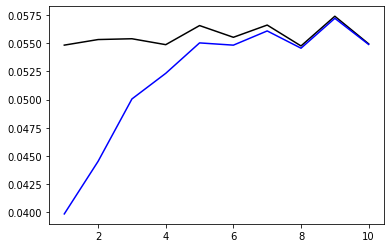

In [24]:
r_ind = 1 # r=0.1
n_ind = 3 # n=100
noise_ind = 2 #noise variance = 0.5
ols_bias = test_bias[:, n_ind, noise_ind, r_ind, 0, 0, 0]
ols_var = test_var[:, n_ind, noise_ind, r_ind, 0, 0, 0]

fig, ax = plt.subplots()
ax.plot(p, ols_bias, 'k')
ax.plot(p, ols_var, 'b')

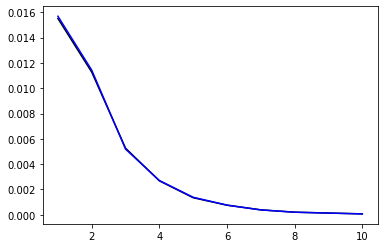

In [27]:
r_ind = 1 # r=0.1
n_ind = 3 # n=100
noise_ind = 2 #noise variance = 0.5
ols_testMSE = test_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0]
ols_trainMSE = train_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0]

fig, ax = plt.subplots()
ax.plot(p, ols_testMSE, 'k')
ax.plot(p, ols_trainMSE, 'b')

In [28]:
p = np.arange(1,15)
np.save("data/p.npy", p)
from apply_regression import apply_regression
methods = ["ols"]
for method in methods:
    if(method=="ols_crossvalidation" or method=="ridge_crossvalidation"):
        r = np.ones(1)*0.1
    if(method=="ols" or method=="ols_crossvalidation" or method=="ridge" or method=="ridge_crossvalidation"):
        n_boots = np.ones(1, dtype=int)
    if(method=="ols" or method=="ols_bootstrap" or method=="ridge" or method=="ridge_bootstrap"):
        k_folds = np.ones(1, dtype=int)
    if(method=="ols" or method=="ols_bootstrap" or method=="ols_crossvalidation"):
        ridge_lambda = np.ones(1)
    train_MSE, test_MSE, train_R2, test_R2, test_bias, test_var = apply_regression(p, n, 
                                                               noise, r, n_boots=n_boots, k_folds=k_folds,
                                                               ridge_lambda=ridge_lambda, reg_type=method)
    r=np.load("data/r.npy")
    ridge_lambda=np.load("data/ridge_lambda.npy")
    k_folds=np.load("data/k_folds.npy")
    n_boots=np.load("data/n_boots.npy")
    np.save("data/train_MSE"+method+".npy", train_MSE)
    np.save("data/test_MSE"+method+".npy", test_MSE)
    np.save("data/train_R2"+method+".npy", train_R2)
    np.save("data/test_R2"+method+".npy", test_R2)
    np.save("data/test_bias"+method+".npy", test_bias)
    np.save("data/test_var"+method+".npy", test_var)
    print(train_MSE.shape)
from apply_regression import plot_stat
methods = ["ols"]
stats = ["train MSE", "test MSE", "test R2", "test bias", "test variance"]

widget.interact(plot_stat, ratio=r.tolist(), num=n.tolist(), stat=stats, 
                method=methods, k_fold=k_folds.tolist(), n_boot=n_boots.tolist(),
                ridge_lmb=ridge_lambda.tolist())

(14, 4, 3, 4, 1, 1, 1)


interactive(children=(Dropdown(description='ratio', options=(0.1, 0.2, 0.30000000000000004, 0.4), value=0.1), …

<function apply_regression.plot_stat(ratio=0.1, num=100, stat='testMSE', method='ols', n_boot=1000, k_fold=1000, ridge_lmb=122.0)>

Text(0.5, 0, 'complexity')

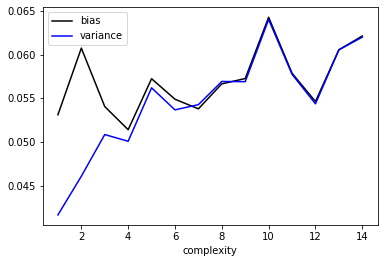

In [39]:
r_ind = 1 # r=0.1
n_ind = 1 # n=100
noise_ind = 2 #noise variance = 0.5
ols_bias = test_bias[:, n_ind, noise_ind, r_ind, 0, 0, 0]
ols_var = test_var[:, n_ind, noise_ind, r_ind, 0, 0, 0]

fig, ax = plt.subplots()
ax.plot(p, ols_bias, 'k', label="bias")
ax.plot(p, ols_var, 'b', label="variance")
ax.legend()
ax.set_xlabel("complexity")

Text(0.5, 0, 'complexity')

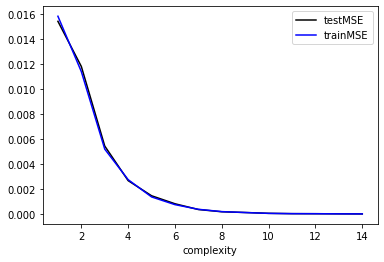

In [44]:
r_ind = 1 # r=0.1
n_ind = 2 # n=100
noise_ind = 2 #noise variance = 0.5
ols_testMSE = test_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0]
ols_trainMSE = train_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0]

fig, ax = plt.subplots()
ax.plot(p, ols_testMSE, 'k', label="testMSE")
ax.plot(p, ols_trainMSE, 'b', label="trainMSE")
ax.legend()
ax.set_xlabel("complexity")